## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections:
    * [First Model](#First-Model)
    * [Create Images](#Create-Images)
    * [Run Images Through Model](#Run-Images-Through-Model)
0. Answer the [Model 1 Questions](#Model-1-Questions)
0. Read through the code for the [Second Model](#Second-Model)
0. Complete [Exercise #1](#Exercise-#1)
0. Optionally, complete [Exercise #2](#Exercise-#2)

First, we'll want to import the keras modules we'll be using for our neural network and the numpy and matplotlib modules that we'll be using for displaying our test images.

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
import numpy as np
from matplotlib.pyplot import imshow
# tell matplotlib to display images within this notebook
%matplotlib inline 

## First Model

Next, let's set up the structure of our model. We'll start with a really simple model, with just one convolutional layer that has just one filter. We are going to be using 9x9-pixel grayscale images, so we set the input shape accordingly. If we were using color images with red-green-blue channels, the last dimension would be size three (one for each color) instead of one.

In [2]:
kernel_size = 3
image_size = 9

In [3]:
model0 = Sequential()
model0.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=1,
                  input_shape=(image_size, image_size, 1)))

Normally at this point, we would compile and train (aka fit) our model, but instead we're going to set the weights manually and then see the output we get on some test images.

First, let's take a look at what the randomly generated weights look like, to understand the format that we'll need to use to set the new weights. By changing the parameters of the model above and looking at how it affects the weight structure, we can understand what each weight is connected to (try it!).

In [4]:
weights = model0.get_weights()
weights

[array([[[[-0.44615477]],
 
         [[ 0.3102712 ]],
 
         [[ 0.2783305 ]]],
 
 
        [[[-0.4075979 ]],
 
         [[-0.12848291]],
 
         [[-0.00170439]]],
 
 
        [[[ 0.31020707]],
 
         [[ 0.09822023]],
 
         [[ 0.26112467]]]], dtype=float32),
 array([0.], dtype=float32)]

Now, we change the weights so that the filter will capture a certain pattern. We'll explore more about what this means below, but feel free to start generating some guesses.

In [5]:
layer_num = 0
filter_num = 0
y = 0
for x in range(kernel_size):
    weights[layer_num][y][x][0][filter_num] = 1
for y in range(1,kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = -1
weights

[array([[[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]]], dtype=float32),
 array([0.], dtype=float32)]

And save those weights back into the model.

In [6]:
model0.set_weights(weights)

## Create Images

Now, let's create some 9x9 images that we will run through our model.

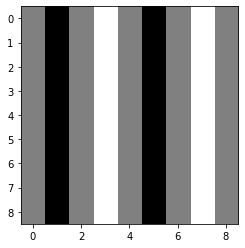

In [7]:
image0 = np.array([
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
], dtype=np.uint8)
imshow(image0, cmap='gray')

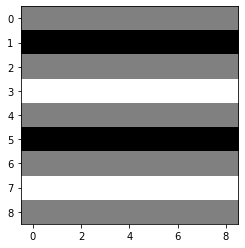

In [8]:
image1 = np.array([
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
], dtype=np.uint8)
imshow(image1, cmap='gray')

## Run Images Through Model

The images need to be in a slightly different format for Keras than they do for the imshow command. Right now, they are 9x9 arrays, and we need them to be 9x9x1 -- three dimensional instead of two.

In [9]:
images = []
for image in [image0, image1]: # You may find it easier to take one of these out, to look at them one at a time
    images.append(np.resize(image, (image_size, image_size, 1)))

And now we give these images to our model and take a look at what the filter has found. 

In [10]:
model0.predict(np.array(images))

array([[[[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]]],


       [[[    0.],
         [    0.],
         [    0

## Model 1 Questions

### Answer these before going on to the second model!

1. There are a lot of numbers in the output above: 2 arrays of 7 arrays of 7 arrays of a single element. Why are they in groups of seven?

Note that the original image is 9x9 and the kernel size is 3x3. Convolving the filter corresponding to the above kernel produces a 7x7 output, with each value as the dot product of the 3x3 filter and 3x3 subsections of the original image.

2. When we created the model, we asked it to have one filter. In which image do we get the highest absolute values in the filter outputs? How does this relate to the pattern of weights that was set?

We obtain the highest absolute values in the **second** image. This is because the 3x3 filter was set to be
$$F=\begin{pmatrix}
1 & 1 & 1 \\
-1 & -1 & -1 \\
-1 & -1 & -1
\end{pmatrix},$$
so the absolute value of the sum of the elements of the elementwise product (denoted $\otimes$ below) of the filter with 3x3 regions of the second image is higher because of its *horizontally*-striped pattern, which allows large negative values to accumulate. For example, letting
$$H = \begin{pmatrix}
0 & 0 & 0 \\
128 & 128 & 128 \\
255 & 255 & 255
\end{pmatrix}$$ be a 3x3 subsection of the second image, we see that 
$$ F\otimes H = \mathbf{e}\begin{pmatrix}
1\cdot 0 & 1\cdot 0 & 1\cdot 0 \\
-1\cdot 128 & -1\cdot 128 & -1\cdot 128 \\
-1\cdot 255 & -1\cdot 255 & -1\cdot 255
\end{pmatrix}\mathbf{e}^T = -1149,$$
where $\mathbf{e}=(1\ 1\ 1)$.

## Second Model

Let's move to a slightly more complex model. Now, there are two convolutional layers, the first with two filters and the second with one filter. One other difference is that we're going to be taking strides so that we only examine each pixel once, instead of looking at overlapping groups. This makes it a little simpler to understand the manual weights.

In [86]:
model1 = Sequential()
model1.add(Conv2D(filters=2,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(image_size, image_size, 1)))
model1.add(Conv2D(filters=1, kernel_size=kernel_size))
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 3, 3, 2)           20        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 1)           19        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


With a different model structure, we will have a different number of weights to fit.

In [12]:
weights = model1.get_weights()
weights

[array([[[[-0.07990974,  0.0486131 ]],
 
         [[ 0.05150864, -0.24700448]],
 
         [[-0.21656972, -0.11074853]]],
 
 
        [[[-0.06669676,  0.3170111 ]],
 
         [[-0.05613759,  0.17230967]],
 
         [[ 0.16172376,  0.27662435]]],
 
 
        [[[ 0.17939124, -0.33212662]],
 
         [[-0.32962996, -0.0513379 ]],
 
         [[ 0.19489679,  0.40333375]]]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[[[-0.3057518 ],
          [-0.22627294]],
 
         [[-0.4550131 ],
          [ 0.24501953]],
 
         [[ 0.2998791 ],
          [-0.13483989]]],
 
 
        [[[-0.1382193 ],
          [-0.1200068 ]],
 
         [[ 0.03080449],
          [-0.12070668]],
 
         [[-0.20504117],
          [-0.14969954]]],
 
 
        [[[ 0.31260642],
          [ 0.13076827]],
 
         [[ 0.3702822 ],
          [ 0.3894088 ]],
 
         [[-0.09165737],
          [ 0.46646526]]]], dtype=float32),
 array([0.], dtype=float32)]

As before, we manually set the weights to match some specific patterns.

In [13]:
layer_num = 0
filter_num = 0 # BRANDON: This filter searches for high values along the main diagonal, i.e., a backslash.
for y in range(kernel_size):
    for x in range(kernel_size):
        if y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

filter_num = 1 # BRANDON: This filter searches for high values along the anti diagonal, i.e., a forward slash.
for y in range(kernel_size):
    for x in range(kernel_size):
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1
            
# BRANDON: Combined, both of these search for a 3-by-3 X-shaped pattern.

In [83]:
# layer 1 is for setting the biases of the first layer.
# They are zero by default, so leave them that way and
# move on to layer 2, which contains the weights for the
# filters of the second layer.
layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0
        if y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
        input_filter_num = 1
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25

# BRANDON: This combines the previous filters to create a filter that searches for X-like patterns.

(5, 5, 2, 1)

And save the weights back into the model.

In [15]:
model1.set_weights(weights)

Again, run our test images through the model to see what the filters output.

In [16]:
def predict_images(model, images):
    resized_images = []
    for image in images:
        resized_images.append(np.resize(image, (image_size, image_size, 1)))
    return model.predict(np.array(resized_images))

In [17]:
predict_images(model1, [image0, image1])

array([[[[-1150.]]],


       [[[-1150.]]]], dtype=float32)

## Exercise #1

Note above that neither image0 nor image1 gets a positive output. Create some images that do get positive ouputs from this model. The code below might help you get started.

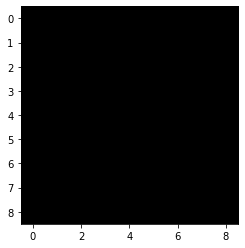

In [18]:
image_black = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)
imshow(image_black, cmap='gray', vmin=0, vmax=255)

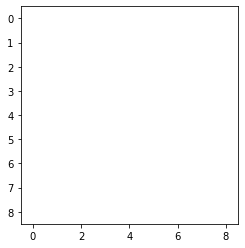

In [19]:
image_white = np.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
], dtype=np.uint8)
imshow(image_white, cmap='gray', vmin=0, vmax=255)

In [20]:
predict_images(model1, [image_black, image_white])

array([[[[    0.]]],


       [[[-2295.]]]], dtype=float32)

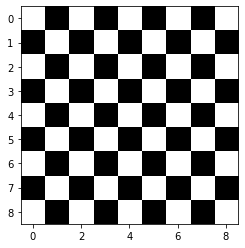

In [21]:
positive_image_1 = np.array([
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
], dtype=np.uint8)
imshow(positive_image_1, cmap='gray', vmin=0, vmax=255)

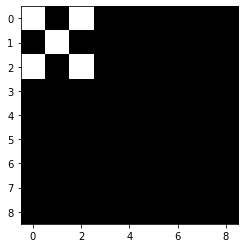

In [81]:
positive_image_2 = np.array([
    [255, 0, 255, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 0, 0, 0, 0, 0],
    [255, 0, 255, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=np.uint8)
imshow(positive_image_2, cmap='gray', vmin=0, vmax=255)

In [82]:
predict_images(model1, [positive_image_1, positive_image_2])

array([[[[3315.  ]]],


       [[[ 191.25]]]], dtype=float32)

## Exercise #2

### Optional

Add additional filters to the model or create a new model with your own filters. Create images that get positive weights for different patterns of filters.

Building a model that searches for the following pattern:
$$\begin{bmatrix}
0 & 1 & 1 & 1 & 1 \\
1 & 0 & 1 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 \\
1 & 0 & 1 & 0 & 1 \\
1 & 1 & 1 & 1 & 0
\end{bmatrix}$$

In [87]:
custom_model = Sequential()
custom_model.add(Conv2D(filters=2,
                  kernel_size=5, # kernel_size=5
                  strides=(5, 5),
                  input_shape=(25, 25, 1)))
custom_model.add(Conv2D(filters=1, kernel_size=5))

custom_pattern = np.array([
    [0, 255, 255, 255, 255],
    [255, 0, 255, 0, 255],
    [255, 255, 0, 255, 255],
    [255, 0, 255, 0, 255],
    [255, 255, 255, 255, 0],
], dtype=np.uint8)

In [88]:
weights = custom_model.get_weights()
weights # These are random initially but are set below.

[array([[[[ 0.14923787, -0.01894605]],
 
         [[ 0.05108514, -0.00839958]],
 
         [[ 0.2357404 , -0.03931451]],
 
         [[ 0.00500327, -0.11979355]],
 
         [[-0.0790749 ,  0.21896407]]],
 
 
        [[[ 0.24282262,  0.05972648]],
 
         [[-0.01823941,  0.06329629]],
 
         [[-0.23789436,  0.09711686]],
 
         [[-0.08210659,  0.05310699]],
 
         [[-0.11122277, -0.17466193]]],
 
 
        [[[ 0.00962439, -0.2555678 ]],
 
         [[-0.19162945, -0.19677785]],
 
         [[-0.06405559, -0.16927531]],
 
         [[ 0.04066247,  0.08285815]],
 
         [[ 0.14442423, -0.02563608]]],
 
 
        [[[-0.2359966 , -0.16701773]],
 
         [[-0.02167165,  0.17102227]],
 
         [[ 0.02850252,  0.09771502]],
 
         [[-0.15074   , -0.22743985]],
 
         [[ 0.2210963 , -0.20957154]]],
 
 
        [[[-0.14428337,  0.19125262]],
 
         [[-0.05076902,  0.19323772]],
 
         [[ 0.21652171,  0.20482108]],
 
         [[-0.06527205, -0.19895378]],
 
    

In [89]:
# Manually set filter weight matrices using numpy indices.

layer_num = 0
filter_num = 0
weights[layer_num][:, :, 0, filter_num] = np.array([
    [-1, -1, -1, -1, -1],
    [1, -1, -1, -1, -1],
    [1, 1, -1, -1, -1],
    [1, -1, 1, -1, -1],
    [1, 1, 1, 1, -1]
])

filter_num = 1
weights[layer_num][:, :, 0, filter_num] = np.array([
    [-1, 1, 1, 1, 1],
    [-1, -1, 1, -1, 1],
    [-1, -1, -1, 1, 1],
    [-1, -1, -1, -1, 1],
    [-1, -1, -1, -1, -1]
])

layer_num = 2
filter_num = 0

weights[layer_num][:, :, 0, filter_num] = np.array([
    [-0.25, 1, 1, 1, 1],
    [1, -0.25, 1, -0.25, 1],
    [1, 1, -0.25, 1, 1],
    [1, -0.25, 1, -0.25, 1],
    [1, 1, 1, 1, -0.25]
])

weights[layer_num][:, :, 1, filter_num] = np.array([
    [-0.25, 1, 1, 1, 1],
    [1, -0.25, 1, -0.25, 1],
    [1, 1, -0.25, 1, 1],
    [1, -0.25, 1, -0.25, 1],
    [1, 1, 1, 1, -0.25]
])

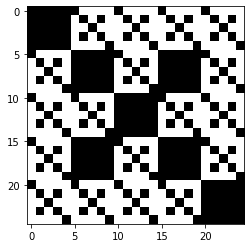

In [96]:
custom_positive_image = np.zeros((25,25))
custom_positive_image[:5,5:] = np.tile(custom_pattern, 4)
custom_positive_image[20:,5:20] = np.tile(custom_pattern, 3)
custom_positive_image[5:,:5] = np.tile(custom_pattern, (4, 1))
custom_positive_image[5:20,20:] = np.tile(custom_pattern, (3, 1))
custom_positive_image[5:10,10:15] = custom_pattern
custom_positive_image[10:15, 5:10] = custom_pattern
custom_positive_image[10:15, 15:20] = custom_pattern
custom_positive_image[15:20, 10:15] = custom_pattern

imshow(custom_positive_image, cmap='gray', vmin=0, vmax=255)

In [97]:
custom_model.predict(custom_positive_image.reshape((1,25,25,1)))

array([[[[76.20179]]]], dtype=float32)